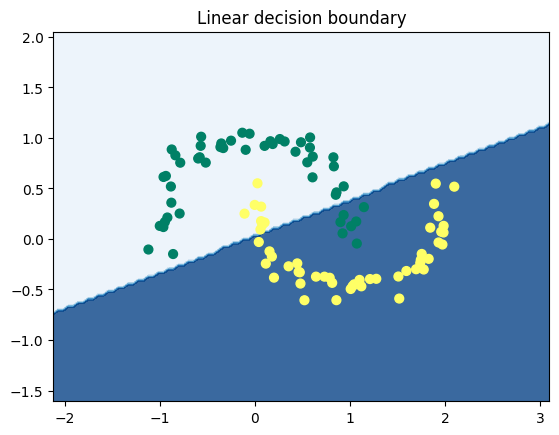

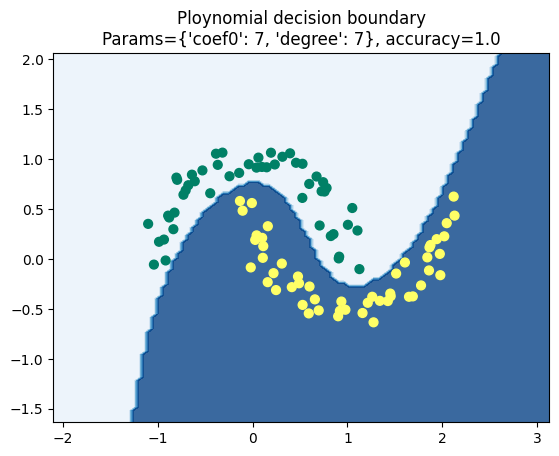

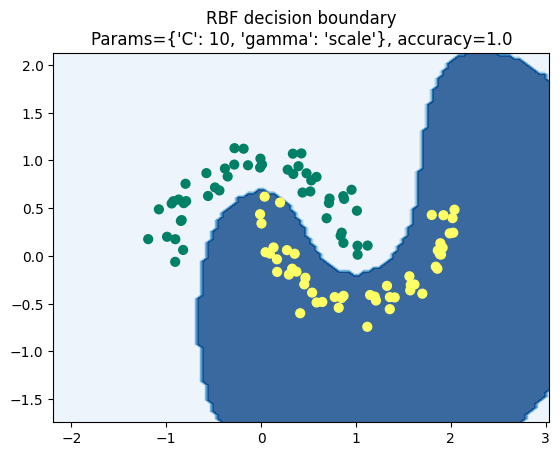

In [4]:
from utils import plot_decision_boundary
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

np.random.seed(12)

def svc_linear_kernel_test():
    """ Try the svc linear kernal """
    x, y = make_moons(n_samples=100, noise=0.1)   # pylint: disable=unbalanced-tuple-unpacking
    model = SVC(kernel='linear')
    model.fit(x, y)
    plot_decision_boundary(x, y, model.predict, title="Linear decision boundary", n_cells=100)

def svc_poly_kernel_test():
    """ Try the svc polynomial kernal """
    x, y = make_moons(n_samples=100, noise=0.1)   # pylint: disable=unbalanced-tuple-unpacking

    # Find the best parameters for a ploynomial kernel, then show the fit
    model = SVC(kernel='poly')
    params = {"degree": sp_randint(1, 10),
                    "coef0": sp_randint(0, 10)}
    models = RandomizedSearchCV(model, param_distributions=params, n_iter=20, cv=5, scoring='accuracy')
    models.fit(x, y)
    model = models.best_estimator_
    accuracy = model.score(x, y)
    plot_decision_boundary(x, y, model.predict, title=f"Ploynomial decision boundary\nParams={models.best_params_}, accuracy={accuracy}", n_cells=100)

def svc_rbf_kernel_test():
    """ Try the RBF kernel """
    x, y = make_moons(n_samples=100, noise=0.1)   # pylint: disable=unbalanced-tuple-unpacking

    model = SVC(kernel='rbf')
    params = {"gamma" : ["scale", "auto"],
        "C": [0.1, 1, 10, 100],
    }
    models = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')
    models.fit(x, y)
    model = models.best_estimator_
    accuracy = model.score(x, y)
    plot_decision_boundary(x, y, model.predict, title=f"RBF decision boundary\nParams={models.best_params_}, accuracy={accuracy}", n_cells=100)

svc_linear_kernel_test()
svc_poly_kernel_test()
svc_rbf_kernel_test()